In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from fastai.tabular import FillMissing, Categorify, Normalize, TabularList, tabular_learner, accuracy, roc_curve, ShowGraph\

from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv("/content/drive/MyDrive/ML/BNP/train.csv.zip", compression="zip")
train, test = train_test_split(df, train_size=0.7)

In [40]:
# Function to convert to hexavigesimal base
def az_to_int(az, nanVal=None):
    if az==az:  #catch NaN
        hv = 0
        for i in range(len(az)):
            hv += (ord(az[i].lower())-ord('a')+1)*26**(len(az)-1-i)
        return hv
    else:
        if nanVal is not None:
            return nanVal
        else:
            return az

In [41]:
def clean_data(df, cat_cols):
    df.v22 = df.v22.apply(az_to_int)
    df.drop(columns='ID', inplace=True)
    for cat_col in cat_cols:
        df[cat_col].fillna("__MISS__", inplace=True)
    return df

In [46]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('v22')
train = clean_data(train, cat_cols)
test = clean_data(test, cat_cols)

In [50]:
procs = [FillMissing, Categorify, Normalize]
test_data = TabularList.from_df(test, cat_names=cat_cols, cont_names=cont_cols)
train_data = (TabularList.from_df(train, 
                                path='.', 
                                cat_names=cat_cols, 
                                cont_names=cont_cols, 
                                procs=procs)
                        .split_by_rand_pct(valid_pct=0.2, seed=1234)
                        .label_from_df(cols = 'target')
                        .databunch())

epoch,train_loss,valid_loss,accuracy,time
0,0.526240,0.513983,0.768058,00:41
1,0.485728,0.487518,0.775619,00:39
2,0.484140,0.481600,0.777431,00:41
3,0.493913,0.479485,0.777868,00:40
4,0.468517,0.477876,0.778305,00:42
5,0.480100,0.474904,0.779118,00:40
6,0.463773,0.473631,0.781180,00:39
7,0.475373,0.468412,0.783679,00:38
8,0.464367,0.472835,0.780930,00:39
9,0.469767,0.475030,0.782679,00:39


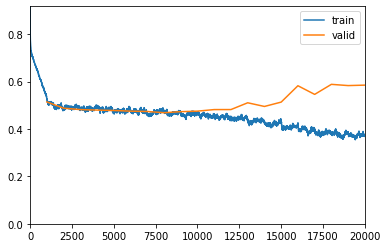

In [53]:
%%time
learn = tabular_learner(train_data, layers=[1000, 200, 15], metrics=accuracy, callback_fns=ShowGraph)
learn.fit_one_cycle(10)

64